In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
h = fits.open('Morph_RM_Match_Python First Lots Clu')

In [3]:
h.info()

Filename: Morph_RM_Match_Python First Lots Clu
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (5538,)   uint8   
  1  Joined        1 BinTableHDU    136   13000R x 54C   [K, D, D, K, 2A, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, J, J, J, J, I, I, D, D, J, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, D]   


In [4]:
H = h[1].data
Morph = H.field(3)
Radius = H.field(36)
print(Radius)

[0.        0.        0.        ... 1.2568468 1.4807678 1.4991579]


In [5]:
Stack = np.vstack((Radius, Morph))
print(Stack)

[[0.         0.         0.         ... 1.25684679 1.48076785 1.49915791]
 [0.         1.         1.         ... 1.         0.         1.        ]]


In [6]:
Bin_1, Bin_2, Bin_3, Bin_4, Bin_5, Bin_6, Bin_7, Bin_8, Bin_9, Bin_10 = np.hsplit(Stack, np.array([1882, 4146, 6181, 7999, 9692, 11179, 12477, 12956, 12996]))

In [13]:
def fraction(array):
    Mor = array[1]
    Spi = 0
    Ell = 0
    Len = 0
    for i in Mor:
        if i == 1:
            Spi = Spi + 1
        elif i == 0:
            Ell = Ell + 1
        else:
            Len = Len + 1
    return Spi/len(Mor), Ell/len(Mor), Len/len(Mor)

def fract(array):
    Mor = array[1]
    Spi = 0
    Ell = 0
    Len = 0
    for i in Mor:
        if i == 1:
            Spi = Spi + 1
        elif i == 0:
            Ell = Ell + 1
        else:
            Len = Len + 1
    return Spi, Ell, Len

In [14]:
Spiral_1, Elliptical_1, Lenticular_1 = fraction(Bin_1)
Spiral_2, Elliptical_2, Lenticular_2 = fraction(Bin_2)
Spiral_3, Elliptical_3, Lenticular_3 = fraction(Bin_3)
Spiral_4, Elliptical_4, Lenticular_4 = fraction(Bin_4)
Spiral_5, Elliptical_5, Lenticular_5 = fraction(Bin_5)
Spiral_6, Elliptical_6, Lenticular_6 = fraction(Bin_6)
Spiral_7, Elliptical_7, Lenticular_7 = fraction(Bin_7)
Spiral_8, Elliptical_8, Lenticular_8 = fraction(Bin_8)
Spiral_9, Elliptical_9, Lenticular_9 = fraction(Bin_9)
Spiral_10, Elliptical_10, Lenticular_10 = fraction(Bin_10)

Spi_1, Ell_1, Len_1 = fract(Bin_1)
Spi_2, Ell_2, Len_2 = fract(Bin_2)
Spi_3, Ell_3, Len_3 = fract(Bin_3)
Spi_4, Ell_4, Len_4 = fract(Bin_4)
Spi_5, Ell_5, Len_5 = fract(Bin_5)
Spi_6, Ell_6, Len_6 = fract(Bin_6)
Spi_7, Ell_7, Len_7 = fract(Bin_7)
Spi_8, Ell_8, Len_8 = fract(Bin_8)
Spi_9, Ell_9, Len_9 = fract(Bin_9)
Spi_10, Ell_10, Len_10 = fract(Bin_10)

In [17]:
Spirals = [Spiral_1, Spiral_2, Spiral_3, Spiral_4, Spiral_5, Spiral_6, Spiral_7, Spiral_8, Spiral_9]
Ellipticals = [Elliptical_1, Elliptical_2, Elliptical_3, Elliptical_4, Elliptical_5, Elliptical_6, Elliptical_7, Elliptical_8, Elliptical_9]
Lenticulars = [Lenticular_1, Lenticular_2, Lenticular_3, Lenticular_4, Lenticular_5, Lenticular_6, Lenticular_7, Lenticular_8, Lenticular_9]

Spis = [Spi_1, Spi_2, Spi_3, Spi_4, Spi_5, Spi_6, Spi_7, Spi_8, Spi_9]
Ells = [Ell_1, Ell_2, Ell_3, Ell_4, Ell_5, Ell_6, Ell_7, Ell_8, Ell_9]
Lens = [Len_1, Len_2, Len_3, Len_4, Len_5, Len_6, Len_7, Len_8, Len_9]
Radii = np.array([0.065, 0.195, 0.325, 0.455, 0.585, 0.715, 0.845, 0.975, 1.105])

[-0.01188898 -0.01621648  0.60568389]
[-0.12989554  0.14541459  0.17474458]
[ 0.14178439 -0.129198    0.21957156]


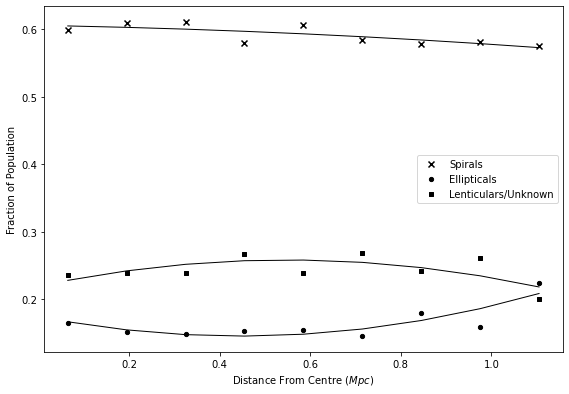

In [18]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*x + b*x**2 + c

popt, pcov = curve_fit(func, Radii, Spirals)
print(popt)

popt2, pcov2 = curve_fit(func, Radii, Ellipticals)
print(popt2)

popt3, pcov3 = curve_fit(func, Radii, Lenticulars)
print(popt3)

plt.figure(1).add_axes((0,0,1.2,1.2))

plt.plot(Radii, func(Radii, *popt), color = 'black', linewidth = '1')
plt.plot(Radii, func(Radii, *popt2), color = 'black', linewidth = '1')
plt.plot(Radii, func(Radii, *popt3), color = 'black', linewidth = '1')

plt.scatter(Radii, Spirals, marker = 'x', color = 'black', label = 'Spirals')
plt.scatter(Radii, Ellipticals, s=18, marker = 'o', color = 'black', label = 'Ellipticals', edgecolors = 'black')
plt.scatter(Radii, Lenticulars, s=16, marker = 's', color = 'black', label = 'Lenticulars/Unknown', edgecolors = 'black')

plt.xlabel("Distance From Centre ($Mpc$)")
plt.ylabel("Fraction of Population")
plt.legend(loc = 'center right')

[  764.16580811 -1626.83468293  1153.99654257]
[ 172.85381603 -390.12270045  302.45519415]
[ 474.04262041 -781.01385497  434.85065015]


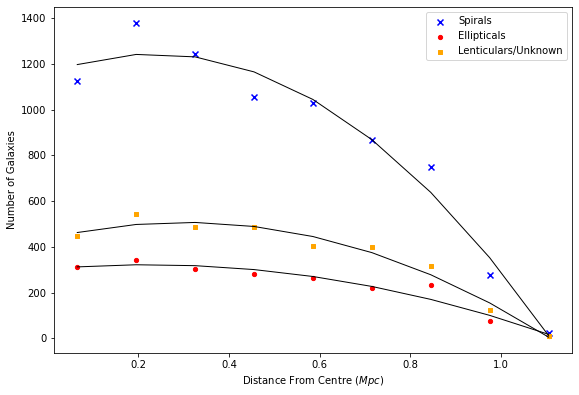

In [22]:
popt4, pcov4 = curve_fit(func, Radii, Spis)
print(popt4)

popt5, pcov5 = curve_fit(func, Radii, Ells)
print(popt5)

popt6, pcov6 = curve_fit(func, Radii, Lens)
print(popt6)

plt.figure(1).add_axes((0,0,1.2,1.2))

plt.plot(Radii, func(Radii, *popt4), color = 'black', linewidth = '1')
plt.plot(Radii, func(Radii, *popt5), color = 'black', linewidth = '1')
plt.plot(Radii, func(Radii, *popt6), color = 'black', linewidth = '1')

plt.scatter(Radii, Spis, marker = 'x', color = 'blue', label = 'Spirals')
plt.scatter(Radii, Ells, s=18, marker = 'o', color = 'red', label = 'Ellipticals')
plt.scatter(Radii, Lens, s=16, marker = 's', color = 'orange', label = 'Lenticulars/Unknown')

plt.xlabel("Distance From Centre ($Mpc$)")
plt.ylabel("Number of Galaxies")
plt.legend(loc = 'upper right')